c:\Users\nilsw\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-01-10 18:39:06,569 INFO: Initializing external client
2026-01-10 18:39:06,570 INFO: Base URL: https://c.app.hopsworks.ai:443
2026-01-10 18:39:08,124 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1326229
2026-01-10 18:39:11,649 INFO: Using ['temperature_2m_stockholm', 'precipitation_stockholm', 'wind_speed_10m_stockholm', 'cloud_cover_stockholm'] from feature group `weather_stockholm` as features for the query. To include primary key and event time use `select_all`.
2026-01-10 18:39:11,651 INFO: Using ['temperature_2m_goteborg', 'precipitation_goteborg', 'wind_speed_10m_goteborg', 'cloud_cover_goteborg'] from feature group `weather_goteborg` as features for the query. To include primary key and event time use `select_all`.
Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1326229/fs/1315907/fv/fv/version/1
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.96s) 


The MSE is: 0.19243038834107679
The R2-score is: 0.3118598239385103


Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\docs/model.json: 100.000%|██████████| 650215/650215 elapsed<00:03 remaining<00:00
Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\docs\assets/img.png: 100.000%|██████████| 524623/524623 elapsed<00:02 remaining<00:00
Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\docs\assets\img/feature_importance.png: 100.000%|██████████| 38558/38558 elapsed<00:01 remaining<00:00
Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\docs\assets\img/forecast.png: 100.000%|██████████| 236942/236942 elapsed<00:02 remaining<00:00
Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\docs\assets\img/hindcast.png: 100.000%|██████████| 399308/399308 elapsed<00:02 remaining<00:00
Uploading c:\Users\nilsw\OneDrive\Skrivbord\puthon\test\model_schema.json: 100.000%|██████████| 1258/1258 elapsed<00:01 remaining<00:00
Model export complete: 100%|██████████| 6/6 [00:23<00:00,  3.94s/it]                   


Model created, explore it at https://c.app.hopsworks.ai:443/p/1326229/models/model_elprice/1


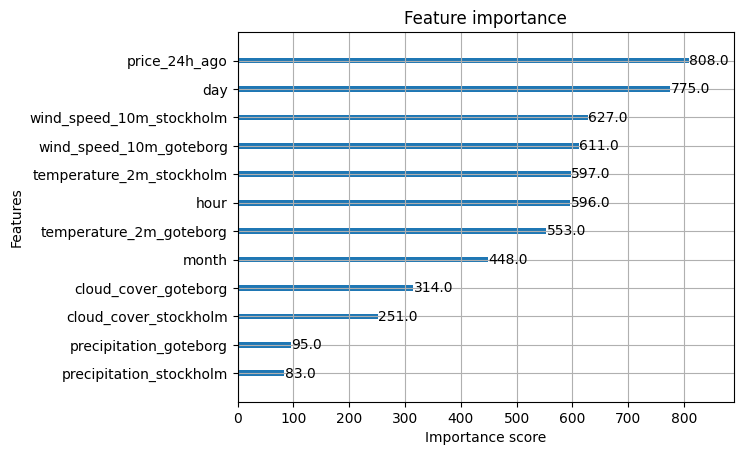

'docs/assets/img'

In [1]:
import util

project = util.connect_to_hopsworks_project()

fs = util.create_fs(project)

model_dir, images_dir = util.create_dirs()


price_fg, weather_1_fg, weather_2_fg = util.get_fgs(fs, "stockholm", "goteborg")

selected_f = util.set_selected_features(price_fg,weather_1_fg,weather_2_fg)

fv = util.create_fv(fs, selected_f)

X_tr, X_ts, y_tr, y_ts = util.set_training_data(fv)

X_tr_f, X_ts_f = util.get_features(X_tr, X_ts)


model = util.model_creation(X_tr_f,y_tr)

y_pr, mse, r2 = util.pred_eval(model,X_ts_f,y_ts)

plot_df = util.df_creation(y_ts,y_pr,X_ts)

util.save_model(model, model_dir)

util.saving_model_hops(fv, mse,r2,project,model_dir)

util.importance_plot(model,images_dir)
util.plot_train("SE3",plot_df,images_dir,True)